In [1]:

#EDA an exploratory and iterative process of asking many questions and find answers from data in order to build better hypothesis for Explanation,Prediction, and control
# understand data , clean data , analysis of relationship between variables
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:

data=pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
data.shape

(1000, 8)

In [13]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
# unique value in gender
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [17]:
# unique value in race/ethnicity
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [18]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [19]:
#cleaning data
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [21]:
#removing irrelevant columns
student=data.drop(['race/ethnicity','parental level of education'],axis=1)

In [22]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


<AxesSubplot:>

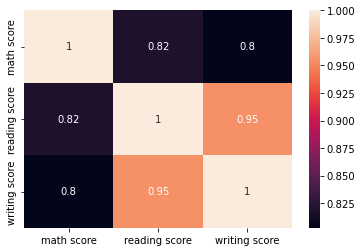

In [23]:
# 2 step: identification of outliers(in our dataset there is no outlier)

# 3 step: relationship analysis

#The annotation function defines how to draw the graphics at a certain position corresponding to the column or

#row in the heatmap.

# everything is same in the heap graph, will not rely on this , pairplot
corelation=student.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

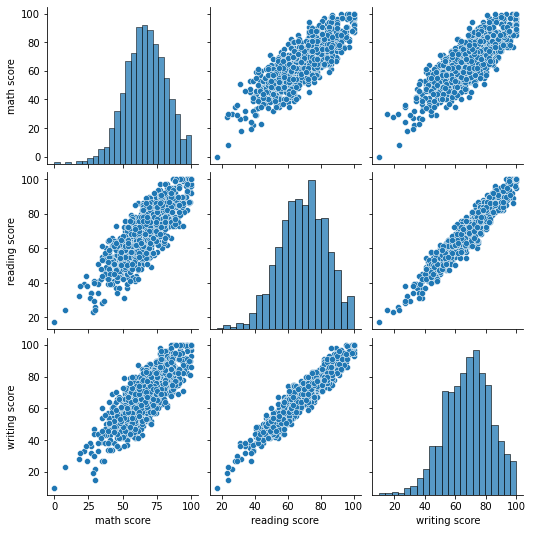

In [24]:
# A pairs plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily
#implemented in Python!

# pairplot is quite descriptive
sns.pairplot(student)

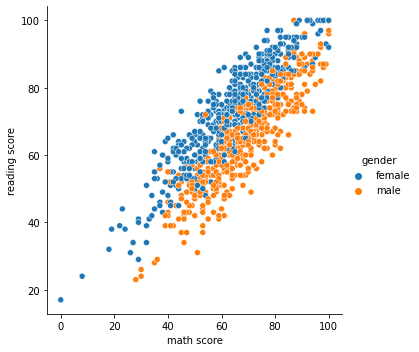

In [25]:
# for better conclusions , use scatterplots

# Scatter plots' primary uses are to observe and show relationships between two numeric variables. 

#The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are 

#taken as a whole. Identification of correlational relationships are common with scatter plots. 

sns.relplot(x='math score',y='reading score', hue='gender',data=student)


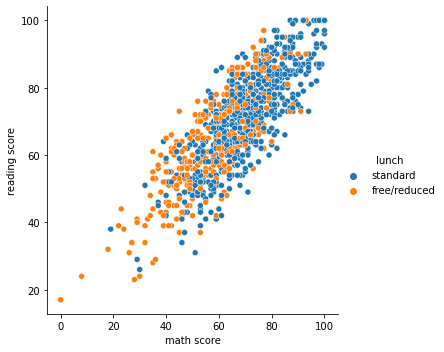

In [27]:

# from graph, scores are good for free/reduced lunch 
sns.relplot(x='math score',y='reading score', hue='lunch',data=student)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

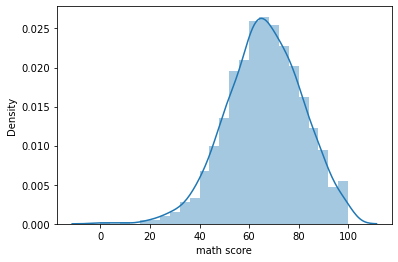

In [28]:
# histogram: taller bar shows more data points are there

# A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents 

#the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to 

#depict the distplot with different variations in it.

sns.distplot(student['math score'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

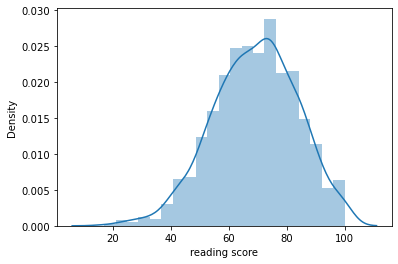

In [29]:
sns.distplot(student['reading score'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

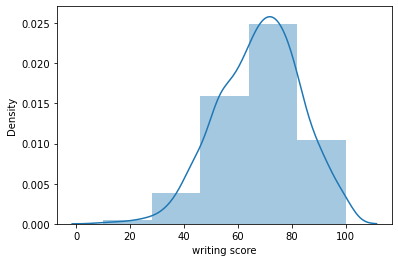

In [25]:
sns.distplot(student['writing score'],bins=5)

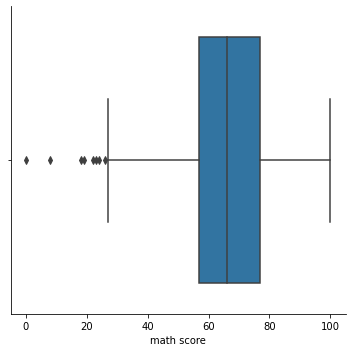

In [26]:
#  categorical plot to identify mean and outliers
sns.catplot(x='math score',kind='box',data=student)

In [30]:


# dataset included info about 28 brands of clean and used vehicles for sale in US.

# 12 features were assembled for each car in the dataset.
import pandas as pd

In [31]:
df=pd.read_csv('USA_cars_datasets.csv')

In [3]:
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [32]:
df.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [33]:
df.tail()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left
2498,2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left


In [35]:
# value count for each brand
df['brand'].value_counts()

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
peterbilt             4
audi                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
harley-davidson       1
jaguar                1
ram                   1
Name: brand, dtype: int64

In [36]:
# 2nd method of extracting columns
df.get('brand')

0          toyota
1            ford
2           dodge
3            ford
4       chevrolet
          ...    
2494       nissan
2495       nissan
2496       nissan
2497       nissan
2498       nissan
Name: brand, Length: 2499, dtype: object

In [37]:
df['model'].value_counts()

door        651
f-150       219
doors       148
caravan     102
mpv          87
           ... 
sl-class      1
cx-3          1
2500hd        1
mdx           1
nvp           1
Name: model, Length: 127, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

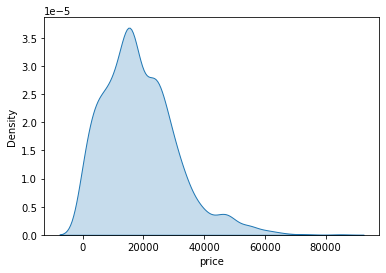

In [38]:
# KDE PLOT DESCRIBED AS KERNEL DENSITY ESTIMATE IS USED FOR VISULAIZING
#THE PROBABILITY DENSITY OF CONTINUOUS VARIABLE
# in our case that cont variable is Price

# idea of how price is distributed
import seaborn as sns
sns.kdeplot(data=df['price'],label="Price",shade=True)

In [13]:
# mean value is 18767.671469, in above graph it is showing the same
df['price'].describe()

count     2499.000000
mean     18767.671469
std      12116.094936
min          0.000000
25%      10200.000000
50%      16900.000000
75%      25555.500000
max      84900.000000
Name: price, dtype: float64

<AxesSubplot:>

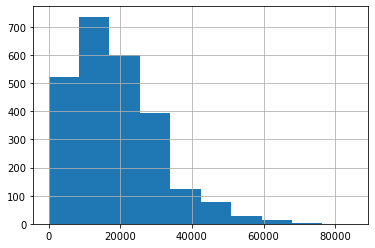

In [39]:
# other way of getting same distribution
df['price'].hist()

<AxesSubplot:>

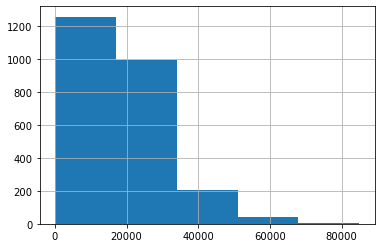

In [41]:
# bins actually represents in how many equal parts data is distributed from min to max 
# change value of bins to understand the distribution accordingly
# by default bin=10
df['price'].hist(bins=5)

<AxesSubplot:>

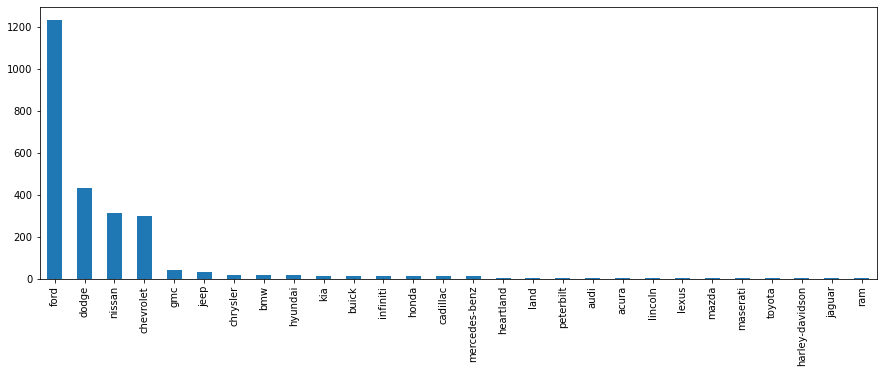

In [44]:
df['brand'].value_counts().plot(kind='bar',figsize=[15,5])

<AxesSubplot:>

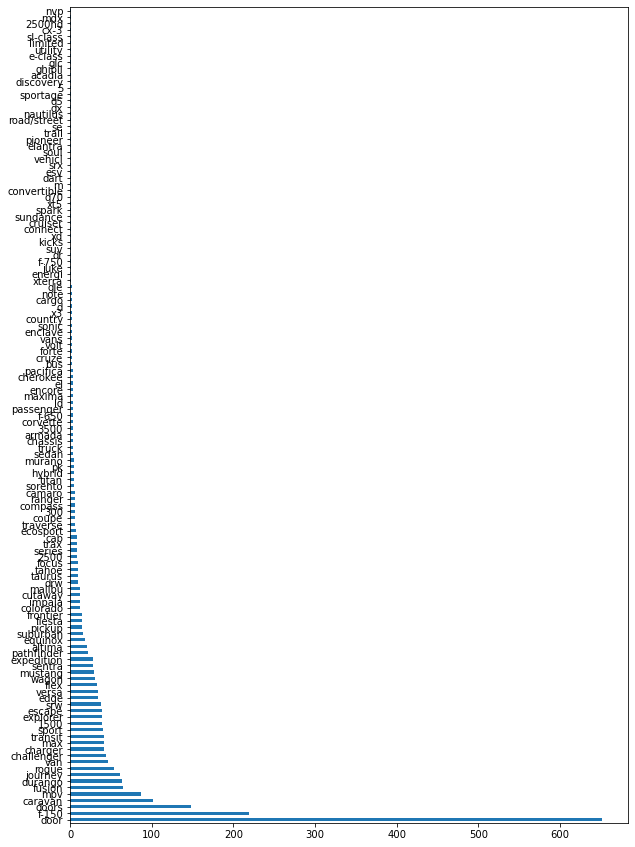

In [22]:
#number of items and grouped by model name
df['model'].value_counts().plot(kind='barh',figsize=[10,15])

In [45]:
cond=max(df['price'])
cond

84900

In [28]:
# which particular brand has this price
df['brand'][df['price']==cond]

502    mercedes-benz
Name: brand, dtype: object

In [46]:

# max value for each brand
# by using reset_index we are creating new data frame table and storing in price_df

price_df=df.groupby('brand')['price'].max().reset_index()

In [30]:
price_df

,brand,price
0,acura,16900
1,audi,36400
2,bmw,61200
3,buick,37500
4,cadillac,47500
5,chevrolet,63200
6,chrysler,29100
7,dodge,67000
8,ford,74000
9,gmc,48500


<AxesSubplot:ylabel='price'>

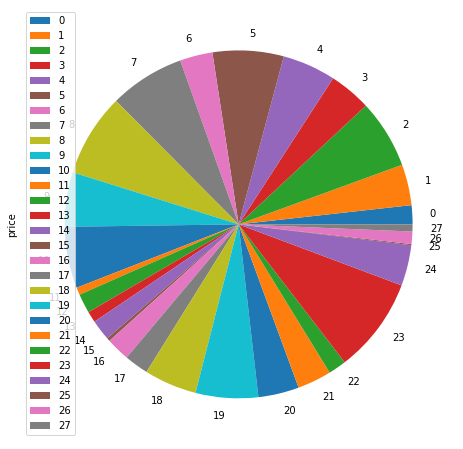

In [31]:
# from pie chart , 23 has highest area, which is again mercedes in previous code
price_df.plot(kind='pie',y='price',figsize=(8,8))

In [47]:
# want to use names instead of numbers in legend in pie chart
price_df_new=price_df.set_index('brand')
price_df_new

,price
brand,
acura,16900
audi,36400
bmw,61200
buick,37500
cadillac,47500
chevrolet,63200
chrysler,29100
dodge,67000
ford,74000


<AxesSubplot:ylabel='price'>

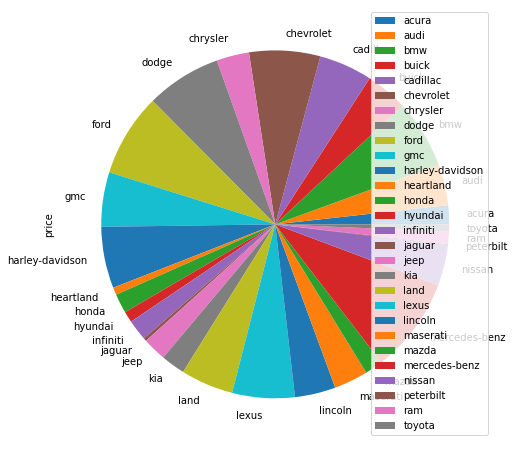

In [33]:
price_df_new.plot(kind='pie',y='price',figsize=[8,8])

In [ ]:

# Two principle questions on EDA
#1. how the variation in variables
#2. How are the variables associated(or correlated ) to one another

# QUESTIONS FOR VARIANCE:
#1. what are the typical values
#2. are there any outliers compared to general trend in the variance
#3. how data is distributed
#4. are there any patterns you can spot in the variance

#CHARTS TO VISUALIZE THE VARIANCE:
#1 Histogram
#2. Density Plot
#3. Bar chart

# HOW TO PICK WHICH CHARTS TO USE:
# IT DEPENDS ON DATA TYPE
#CONTINUOUS DATA VS CATEGORICAL DATA

# Numerical : Numeric,Integer,Double
#Date/Time: Date, POSIXct


# Visualize the variance of Numerical Variables with (Histogram and Density Plot)

#VISUALIZING VARIANCE WITH HISTOGRAM:
#1. visualize a variance of monthly income
#2. find if there is difference in the Monthly Income variance between Male and Female
#3. Find if there is difference in the Monthly Income variance among Job Roles


# ASSOCIATION:
#Any type of relationship between two variables.

# CORRELATION:
# A certain type of (usually linear) association between two variables.

# ASSOCIATION AND CORRELATION:
# a relationship where changes in one variable happen together with 
# changes in another variable with certain rule.

# if we can find strong correlations , it makes it easier to 
# explain how monthly income changes and to predict what 
# monthly income will be

#A correlation between variables, however, does not 
#automatically mean that the change in one variable is 
#the cause of the change in the values of the other 
#variable. Causation indicates that one event is the 
#result of the occurrence of the other event; i.e.
#there is a causal relationship between the two events.


# Correlation is not equal to causation
# Causation is a special type of correlation

# if we can confirm a given correlation is causation,
#then we can control the outcome

# visualizing Association and Correlation
#(with box plots, violin plot,density plot,scatter plot, heatmap, stackbar)

#HOW TO CHOOSE THE RIGHT CHARTS:
# COMBINATION OF DATA TYPES:
#1. CATEGORY VS NUMERICAL
#2. NUMERICAL VS NUMERICAL
# 3. CATEGFORY VS CATEGORY

#BOXPLOT
#1. displays the distribution of numerical values by category
#2. Y axis represents range of values , X axis represents each category






In [1]:

# Data Cleaning: The process of detecting and correcting corrupt or inaccurate records from database is said to be Data 
#Cleaning

# Data Manipulation: The process of changing data to make it more organised and easy to read is known as Data Manipulation

# EDA is nothing but data exploration technique to understand the various aspects of the data.

# Steps involved in EDA
#1. Understand the data
#2. clean the data
#3. analysis of relationship b/w variables

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style('whitegrid')
%matplotlib inline

In [51]:
# load data
# in survived(0 means dead, 1 means survived)
# Pclass( 1,2 or 3)
# Embarked means from where passenger geton the ship
titanic_df=pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# no null values, how many survived and how many died
# problem statement is to predict whether new passenger who went on the ship is survived or not( who took ticket but got delayed or something)
# all integer data and object means String
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
# statistics of data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


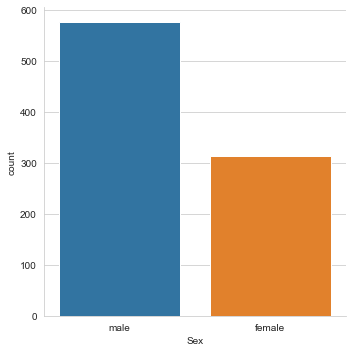

In [54]:
#gender plot(how many males anf females)
sns.factorplot('Sex',data=titanic_df,kind='count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


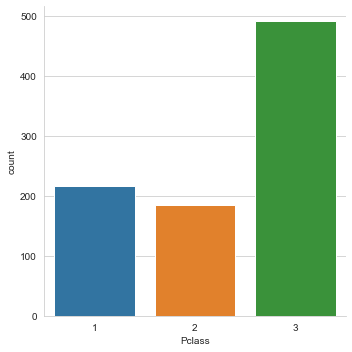

In [55]:
# how many passengers are in diff class
sns.factorplot('Pclass',data=titanic_df,kind='count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


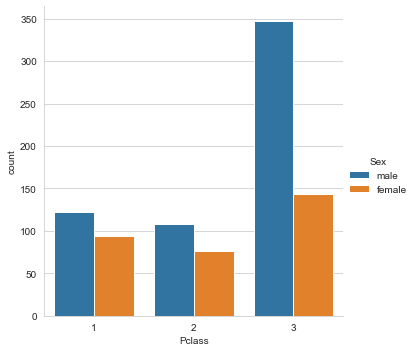

In [56]:
#gender distribution among the classes
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [58]:
# this gives us an insight that there are quite a few males than females in 3rd class.
# and how many children
def titanic_children(passenger):
    age,sex=passenger
    if age< 16:
        return 'child'
    else: 
        return sex
titanic_df['person']=titanic_df[['Age','Sex']].apply(titanic_children,axis=1)

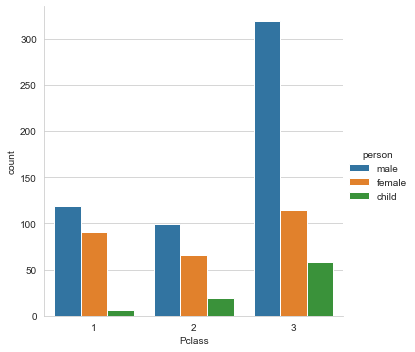

In [59]:
# plot a graph to check the ratio of male,female and children in each category of class
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

<AxesSubplot:>

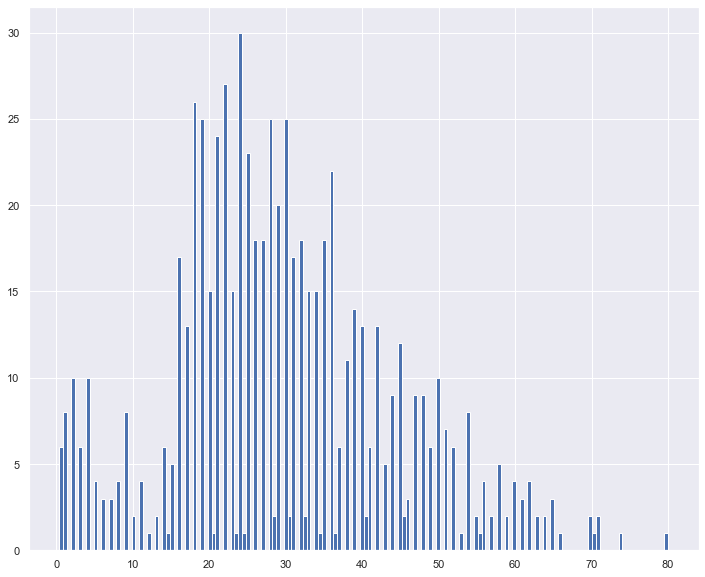

In [61]:
# plotting age, we know 80 is the oldest age and youngest is only few months old
sns.set(rc={'figure.figsize':(12,10)})
titanic_df['Age'].hist(bins=160)

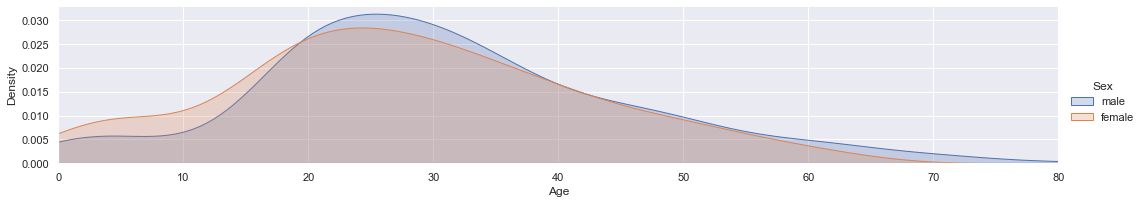

In [62]:
# preproseeing for chidren age(mr, mrs, master in name column)
# distribution of each class by age
as_fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

In [65]:
# mean age of passengers
titanic_df['Age'].mean()

29.69911764705882

In [67]:
# filling missing values
# it is the crude way 
# because whereever there is no age put avg age
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [68]:
#age is filled by avg
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  person       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [69]:
# drop the cabin column as there are many null values and it does not help in making prediction
# few cabins values (only for 1st class)
titanic_df.drop('Cabin',axis=1,inplace=True)

In [70]:
# filling null values in the Embarked column with S as there are more number of passengers boarded
titanic_df['Embarked']=titanic_df['Embarked'].fillna('S')

In [71]:
# to check if there are still any null values in dataset
titanic_df.isnull().values.any()

False

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


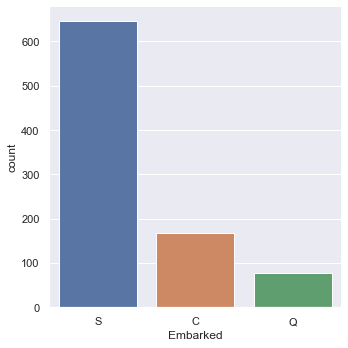

In [73]:
# to get data who embarked where place
sns.factorplot('Embarked',data=titanic_df,kind='count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


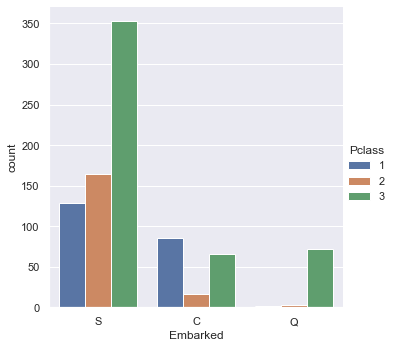

In [20]:
# from graph ,it is interesting to see that most of the passengers boarded at Queenstown are from 3rd class
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count')

In [75]:
# let check who are with family and who are alone
# this can be found by adding Parch and Sibsp columns
titanic_df['Alone']=titanic_df.Parch+titanic_df.SibSp
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  person       891 non-null    object 
 12  Alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [76]:
# if alone value is  > 0 then they are with family else they are alone
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Without Family'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


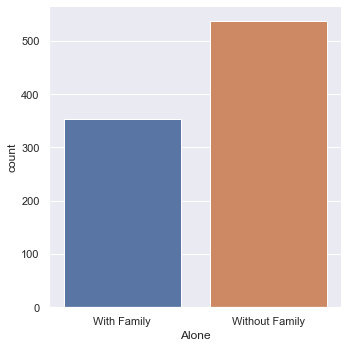

In [23]:
#let us visualize the Alone column
sns.factorplot('Alone',kind='count',data=titanic_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


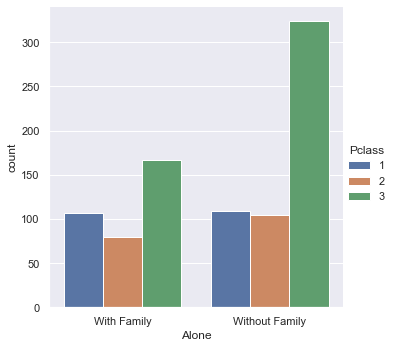

In [77]:
#let us see who are alone according to class
sns.factorplot('Alone',kind='count',data=titanic_df,hue='Pclass')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


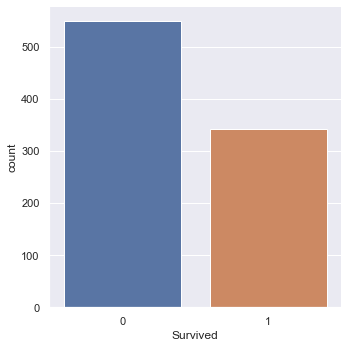

In [78]:
sns.factorplot('Survived',data=titanic_df,kind='count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


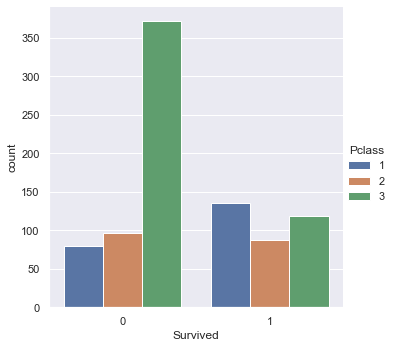

In [79]:
# checking of the class had any effect in the survival rate
sns.factorplot('Survived',data=titanic_df,kind='count',hue='Pclass')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


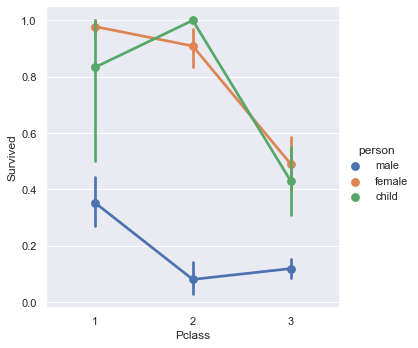

In [80]:
# from graph ,it shows that survival rate for male is very low regardless of the class.And survival rate is less for the 3rd class passengers.
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


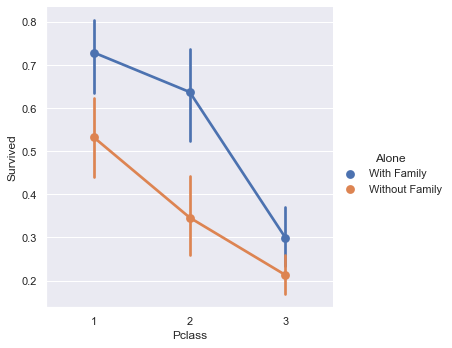

In [81]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='Alone')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


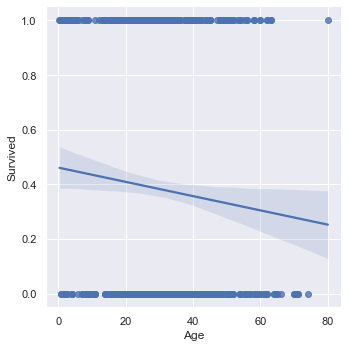

In [82]:
# survival with age
sns.lmplot('Age','Survived',data=titanic_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


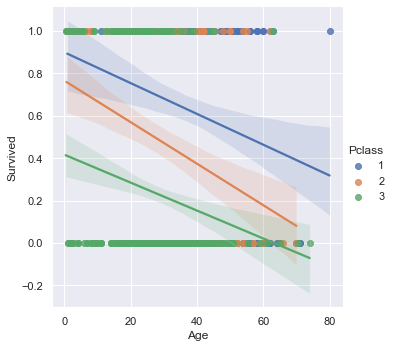

In [30]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


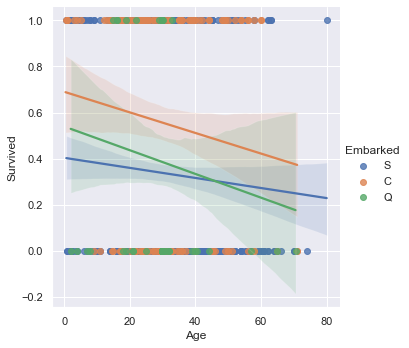

In [31]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Embarked')

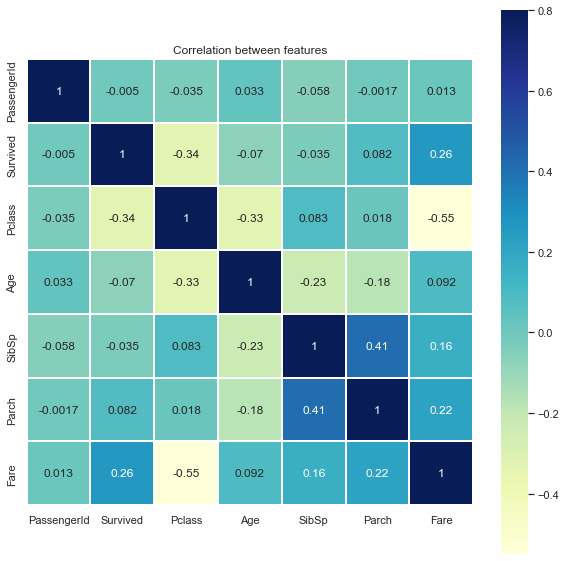

In [35]:
# for each correlation(1 means directly related and 0 means inversely related)
corr=titanic_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [36]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,female,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,male,Without Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,male,Without Family
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,female,Without Family
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,female,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,male,Without Family


In [83]:
person_dummies=pd.get_dummies(titanic_df['person'])
alone_dummies=pd.get_dummies(titanic_df['Alone'])
embarked_dummies=pd.get_dummies(titanic_df['Embarked'])
embarked_dummies.drop('Q',axis=1,inplace=True)

In [84]:
pclass_dummies=pd.get_dummies(titanic_df['Pclass'])
pclass_dummies.columns=['class_1','class_2','class_3']

In [85]:
import math
titanic_df['Age']=titanic_df['Age'].apply(math.ceil)
titanic_df['Fare']=titanic_df['Fare'].apply(math.ceil)

In [86]:
titanic_df=pd.concat([titanic_df,pclass_dummies,person_dummies,alone_dummies,embarked_dummies],axis=1)

In [87]:
# converting it into numbers
titanic_df.drop(['PassengerId','Name','Sex','SibSp','Parch','Ticket','Embarked'],axis=1,inplace=True)
titanic_df.drop(['Alone','person','Pclass','Without Family','male','class_3'],axis=1,inplace=True)
titanic_df.head()

,Survived,Age,Fare,class_1,class_2,child,female,With Family,C,S
0,0,22,8,0,0,0,0,1,0,1
1,1,38,72,1,0,0,1,1,1,0
2,1,26,8,0,0,0,1,0,0,1
3,1,35,54,1,0,0,1,1,0,1
4,0,35,9,0,0,0,0,0,0,1


In [88]:
titanic=titanic_df.drop('Survived',axis=1)
titanic_survived=titanic_df.Survived

In [89]:
x_train,x_test,y_train,y_test=train_test_split(titanic,titanic_survived,test_size=0.2)

In [90]:
# building the model to predict the survival
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
train_survival=log_model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
print("Accuracy Score of logistic model is",metrics.accuracy_score(y_true=y_test,y_pred=train_survival))

Accuracy Score of logistic model is 0.7597765363128491
